In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
application_data=pd.read_csv("application_data.csv")

In [3]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
previous_application=pd.read_csv("previous_application.csv")

In [5]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
########DATA CLEANING FOR APPLICATION DATA

In [7]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
application_data.isnull().sum().values

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,     12,    278,   1292,      0,      0,      0,      0,
            0,      0,      0,      0,      0, 202929,      0,      0,
            0,      0,      0,      0,  96391,      2,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0, 173378,    660,  60965, 156061, 179943, 150007, 204488,
       214865, 163891, 154828, 153020, 208642, 182590, 210199, 154350,
       213514, 169682, 156061, 179943, 150007, 204488, 214865, 163891,
       154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682,
       156061, 179943, 150007, 204488, 214865, 163891, 154828, 153020,
       208642, 182590, 210199, 154350, 213514, 169682, 210295, 154297,
       148431, 156341, 145755,   1021,   1021,   1021,   1021,      1,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [14]:
#####Finding the columns which have more than 30% of the null values
NA_data=application_data.isnull().sum()
NA_data = NA_data[NA_data.values >(0.30*len(application_data))]
len(NA_data)

50

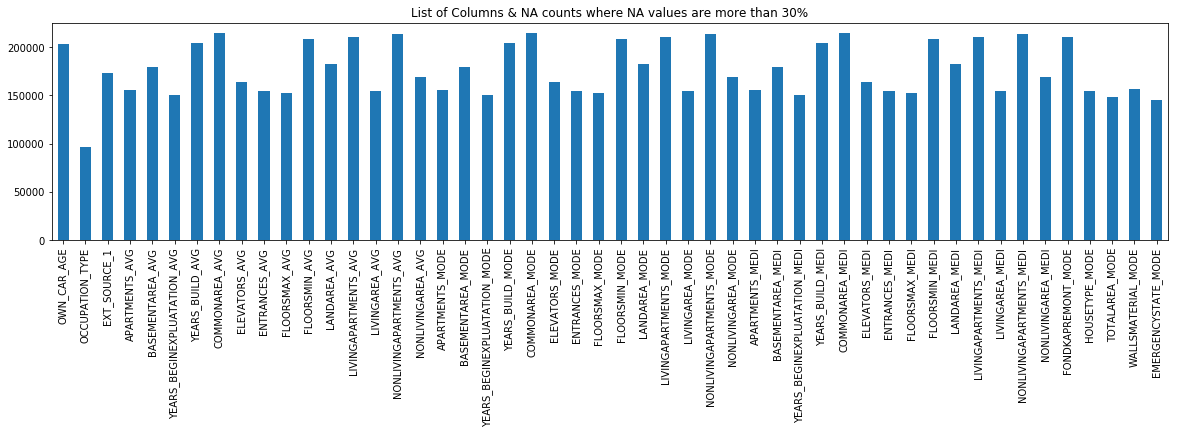

In [15]:
####there are 50 columns which have null values more than 30% in their data, you can look into graph below whose columns have
#NA values more than 30%
plt.figure(figsize=(20,4))
NA_data.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

In [16]:
print(application_data["OCCUPATION_TYPE"].describe())
application_data["OCCUPATION_TYPE"].unique()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object


array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [17]:
###OCCUPATION TYPE WHERE NAN IS PRESENT CAN BE PLACED WITH SELF EMPLOYED AS THEY DONT HAVE ANY OCUUPATION

application_data.loc[pd.isnull(application_data["OCCUPATION_TYPE"]),["OCCUPATION_TYPE"]]="Self Employed"

In [18]:
NA_data=application_data.isnull().sum()
NA_data = NA_data[NA_data.values >(0.30*len(application_data))]
len(NA_data)

49

In [19]:
columns_eligible_to_drop=NA_data.index

In [20]:
#### We will remove those 49 columns as it is not feasable to impute missing values for those columns

In [21]:
application_data_dc=application_data.drop(columns_eligible_to_drop,axis=1).copy()

In [22]:
####all the null values in AMT_REQ_CREDIT_BUREAU* columns can be filled with 0

In [23]:
application_data_dc.loc[pd.isnull(application_data_dc["AMT_REQ_CREDIT_BUREAU_HOUR"]),["AMT_REQ_CREDIT_BUREAU_HOUR"]]=0
application_data_dc.loc[pd.isnull(application_data_dc["AMT_REQ_CREDIT_BUREAU_DAY"]),["AMT_REQ_CREDIT_BUREAU_DAY"]]=0
application_data_dc.loc[pd.isnull(application_data_dc["AMT_REQ_CREDIT_BUREAU_WEEK"]),["AMT_REQ_CREDIT_BUREAU_WEEK"]]=0
application_data_dc.loc[pd.isnull(application_data_dc["AMT_REQ_CREDIT_BUREAU_MON"]),["AMT_REQ_CREDIT_BUREAU_MON"]]=0
application_data_dc.loc[pd.isnull(application_data_dc["AMT_REQ_CREDIT_BUREAU_QRT"]),["AMT_REQ_CREDIT_BUREAU_QRT"]]=0
application_data_dc.loc[pd.isnull(application_data_dc["AMT_REQ_CREDIT_BUREAU_YEAR"]),["AMT_REQ_CREDIT_BUREAU_YEAR"]]=0

In [24]:
application_data_dc.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

In [25]:
print(round(100 *(application_data_dc.isnull().sum()/len(application_data_dc.index)),2))
series=round(100 *(application_data_dc.isnull().sum()/len(application_data_dc.index)),2)
 

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 73, dtype: float64


In [26]:
series[series.values>0]

AMT_GOODS_PRICE              0.09
NAME_TYPE_SUITE              0.42
EXT_SOURCE_2                 0.21
EXT_SOURCE_3                19.83
OBS_30_CNT_SOCIAL_CIRCLE     0.33
DEF_30_CNT_SOCIAL_CIRCLE     0.33
OBS_60_CNT_SOCIAL_CIRCLE     0.33
DEF_60_CNT_SOCIAL_CIRCLE     0.33
dtype: float64

In [27]:
application_data_dc["AMT_GOODS_PRICE"].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [28]:
#since the percentage of NAN values in "AMT_GOODS_PRICE" is very low it is ideal to remove the rows which have null values
application_data_dc= application_data_dc[~np.isnan(application_data_dc["AMT_GOODS_PRICE"])]

In [29]:
print(application_data_dc["NAME_TYPE_SUITE"].describe())
application_data_dc["NAME_TYPE_SUITE"].unique()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object


array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

count    3.065740e+05
mean     5.143934e-01
std      1.910700e-01
min      8.173617e-08
25%      3.924431e-01
50%      5.659722e-01
75%      6.636305e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


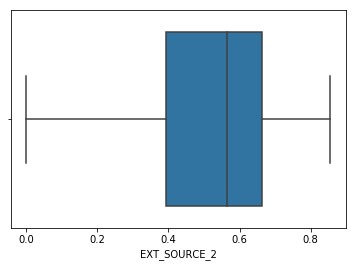

In [30]:
print(application_data_dc["EXT_SOURCE_2"].describe())
sns.boxplot(application_data_dc["EXT_SOURCE_2"])
plt.show()

In [35]:
#since box plot shows mean is not at the center and also since only 2% of rows have NAN we can remove the rows instead 
#replacing with values
application_data_dc= application_data_dc[~np.isnan(application_data_dc["EXT_SOURCE_2"])]

count    245906.000000
mean          0.510800
std           0.194856
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


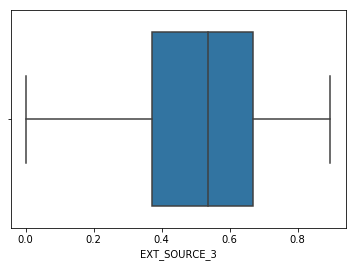

In [36]:
print(application_data_dc["EXT_SOURCE_3"].describe())
sns.boxplot(application_data_dc["EXT_SOURCE_3"])
plt.show()

In [37]:
#Though boxplot shows the mean is almost at the center but 19% of data has NAN values replacing with the values is not ideal
# though standard deviation seems to be very less, if we observe the mean values and maximum values the data in this column is
# between 0-1 and replacing it with mean would be a bad idea , so it is ideal to remove the rows with NAN

application_data_dc= application_data_dc[~np.isnan(application_data_dc["EXT_SOURCE_3"])]

In [38]:
print(application_data_dc["OBS_30_CNT_SOCIAL_CIRCLE"].describe())
print(application_data_dc["OBS_30_CNT_SOCIAL_CIRCLE"].unique())

count    245159.000000
mean          1.435656
std           2.423070
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64
[  2.   0.   1.   8.  10.   4.  nan   7.   3.   6.   5.  13.  12.  11.
  14.   9.  22.  16.  17.  20.  15.  25.  19.  18.  21.  24.  23.  28.
  29.  27.  47. 348.  30.  26.]


In [39]:
series=round(100 *(application_data_dc.isnull().sum()/len(application_data_dc.index)),2)
series[series.values>0]

NAME_TYPE_SUITE             0.35
OBS_30_CNT_SOCIAL_CIRCLE    0.30
DEF_30_CNT_SOCIAL_CIRCLE    0.30
OBS_60_CNT_SOCIAL_CIRCLE    0.30
DEF_60_CNT_SOCIAL_CIRCLE    0.30
dtype: float64

In [40]:
print(application_data.shape)
print(application_data_dc.shape)
print(len(application_data_dc)/len(application_data))

#This shows 80% of data is retrieved and we can proceed for analysis 

(307511, 122)
(245906, 73)
0.7996657030155019


In [41]:
print(application_data_dc.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [42]:
#Now that we completed cleaning of application_data, we will look into previous_application_data and clean if necessary
print(previous_application.info())
previous_application.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

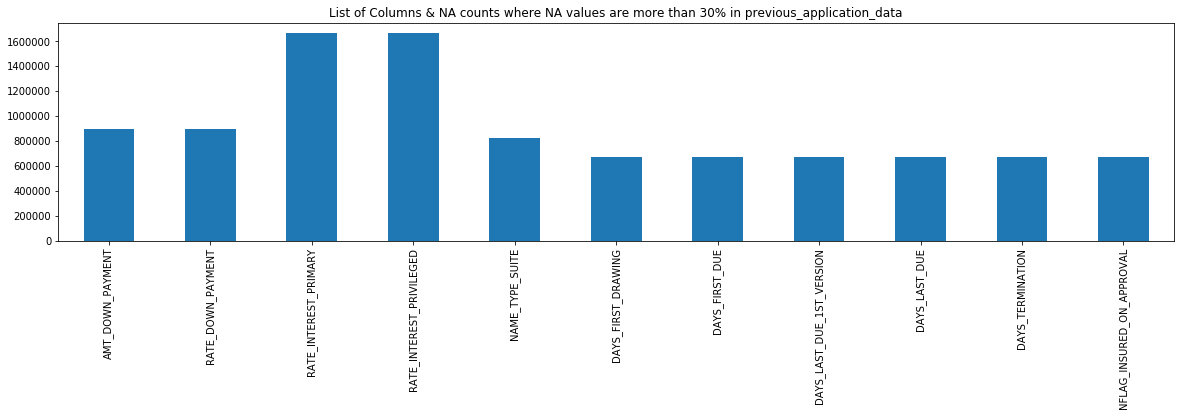

In [43]:
NA_pdata=previous_application.isnull().sum()
NA_pdata = NA_pdata[NA_pdata.values >(0.30*len(previous_application))]
plt.figure(figsize=(20,4))
NA_pdata.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30% in previous_application_data')
plt.show()

In [44]:
columns_eligible_to_drop=NA_pdata.index

previous_application_dc=previous_application.drop(columns_eligible_to_drop,axis=1).copy()

In [45]:
print(previous_application.shape)
previous_application_dc.shape

(1670214, 37)


(1670214, 26)

In [46]:
series2=round(100 *(previous_application_dc.isnull().sum()/len(previous_application_dc.index)),2)
series2[series2.values>0]

AMT_ANNUITY            22.29
AMT_GOODS_PRICE        23.08
CNT_PAYMENT            22.29
PRODUCT_COMBINATION     0.02
dtype: float64

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


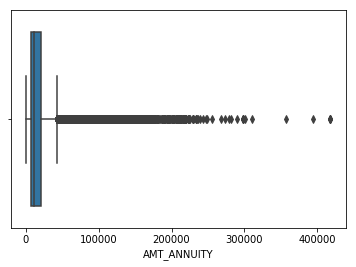

92.64823281638127

In [53]:
print(previous_application_dc["AMT_ANNUITY"].describe())
sns.boxplot(previous_application_dc["AMT_ANNUITY"])
plt.show()
((previous_application_dc["AMT_ANNUITY"].std()/previous_application_dc["AMT_ANNUITY"].mean())*100)
#### since this shows there are so many outliers we can replace NAN values with median

In [54]:
previous_application_dc["AMT_ANNUITY"].fillna(previous_application_dc["AMT_ANNUITY"].median(), inplace=True)
#replacing NA with median as it has many outliers

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


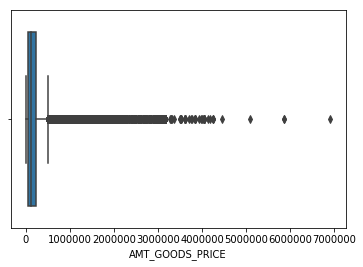

In [55]:
print(previous_application_dc["AMT_GOODS_PRICE"].describe())
sns.boxplot(previous_application_dc["AMT_GOODS_PRICE"])
previous_application_dc["AMT_GOODS_PRICE"].fillna(previous_application_dc["AMT_GOODS_PRICE"].median(), inplace=True)
#replacing NA with median as it has many outliers

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


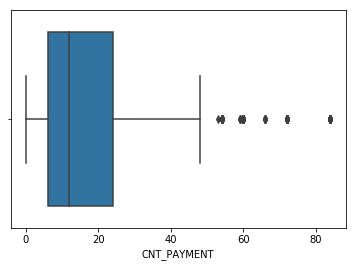

In [58]:
print(previous_application_dc["CNT_PAYMENT"].describe())
sns.boxplot(previous_application_dc["CNT_PAYMENT"])
 
previous_application_dc["AMT_GOODS_PRICE"].fillna(previous_application_dc["AMT_GOODS_PRICE"].mean(), inplace=True)
#Replacing with mean as it seems less outliers

In [59]:
print(previous_application_dc["PRODUCT_COMBINATION"].describe())

previous_application_dc["PRODUCT_COMBINATION"].mode()
previous_application_dc["PRODUCT_COMBINATION"].fillna(previous_application_dc["PRODUCT_COMBINATION"].mode()[0], inplace=True)


##### filling na values with mode as this is categorical variable

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object


In [60]:
###### with this both the data sets are addressed with missing values and we can focus on analyzation

In [61]:
## ANALYZATION OF DATA COLUMNS , OUR FOCUS IS MORE ON TARGET VARIABLE AS IT IS THE MAIN COLUMN WHICH DESCRIBES WEATHER THE 
## APPLICANT IS DEFAULTER OR NON-DEFAULTER WE SHOULD ANALYZE THE TARGET VARIABLE AND SEE HOW THE COLUMN IS POPULATED
# MAINLY BECAUSE SINCE THIS DATA MIGHT BE USED FOR ML MODEL (TARGET VARIABLE SHOULD NOT BE BIASED), ML CLASSIFICATION
# WILL DEPEND ON DATA

In [62]:
DEFAULTER = 0; NON_DEFAULTER = 0 # initialisation

for i in application_data_dc['TARGET'].values:
    if i == 1:
        DEFAULTER = DEFAULTER+1
    else:
        NON_DEFAULTER = NON_DEFAULTER+1

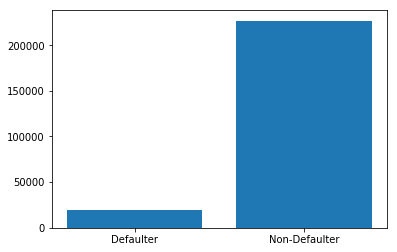

In [63]:
X = ['Defaulter','Non-Defaulter']
Y= [DEFAULTER,NON_DEFAULTER]
plt.bar(X,Y, width = 0.8)
plt.show()

#This shows that most of the clients dont have payment difficulties and the data is biased towards non-defaulter(clients dont
#have payment difficulties)